## HW 4 Problem 3


### (a) Defind BFGS for Rosenbrock function

In [1]:
import scipy
import numpy as np
import matplotlib.pyplot as plt

In [26]:
# define Hessian matrix for Rosenbrock
def Hessian(x):
    n = int(len(x))
    H = np.zeros((n,n))

    H[0,0] = 1200*(x[0]**2)-400*x[1]+2
    H[0,1] = -400*(x[0])

    for i in range(1,n-1):

        H[i,i-1] = -400*x[i-1]
        H[i,i] = 1200*(x[i]**2)-400*x[i+1]+202
        H[i,i+1] = -400*x[i]
    
    H[n-1,n-2] = -400*x[n-2]
    H[n-1,n-1] = 200

    return H


# define Gradient for Rosenbrock

def Gradient_Rosenbrock(x):
    n = int(len(x))
    G = np.zeros(n)
    G[0] = 400*(x[0]**3)-400*x[0]*x[1]+2*x[0]-2
    for i in range(1,n-1):
        G[i] = 200*x[i] - 200*(x[i-1]**2) + 400*(x[i]**3) - 400*x[i]*x[i+1] + 2*x[i] - 2

    G[n-1] = 200*(x[n-1] - (x[n-2]**2))

    return G

# define function value of Rosenbrock

def f_Rosenbrock(x):
    f = 0
    n = int(len(x))

    for i in range(n-1):
        f = f + 100*(x[i+1] - (x[0]**2))**2 + (x[i] - 1)**2
    

    return f


# combine above parameters

def Rosenbrock(x):
    return f_Rosenbrock(x),Gradient_Rosenbrock(x)

# Backtracking
def step_length_Rosenbrock(f_x,g,X,p):
    alpha = 1
    rho = 0.8
    c_1 = 0.5
    x_new = X + alpha*p
    
    f_x_new = f_Rosenbrock(x_new)
    
    special_count = 1
    
    while(f_x_new > (f_x + c_1*alpha*np.dot(g,p))):
        alpha = rho*alpha
        x_new = X + alpha*p
        f_x_new = f_Rosenbrock(x_new)
        special_count = special_count + 1

        if(special_count == 6):
            alpha = 1
            return alpha,special_count
    return alpha,special_count


In [61]:
# Damped BFGS
def damp(B,s,y):
    theta = 0
    P = s.T @ B @ s

    if(np.dot(s,y) >= (0.2 * P)):
        theta = 1
    else:
        theta = 0.8*(P)/(P - np.dot(s,y))
    
    r = theta*y + (1 - theta)*(B @ s)

    # print(B @ s, s.T @ B,(B @ s) @ (s.T @ B))
    B_new = B - (np.outer((B @ s),(s.T @ B)))/P + np.outer(r,r)/(np.dot(s,r))

    return B_new
    

In [68]:
def bfgs_rosenbrock(x_in,tol,iter):
    X = x_in
    n = 0
    f_x,g = Rosenbrock(X)
    B = Hessian(X)
    number_evaluate = 0
    while(n < iter and np.linalg.norm(g) > tol):
        p = np.linalg.lstsq(-B,g.T)[0]
        alpha,counts = step_length_Rosenbrock(f_x,g,X,p)
        X_new = X + alpha*p
        f_x_new,g_new = Rosenbrock(X_new)
        s = X_new - X
        y = g_new - g

        B = damp(B,s,y)
        X = X_new
        g = g_new
        f_x = f_x_new
        n = n + 1
        number_evaluate = number_evaluate + counts + 1
    
    return X,number_evaluate



In [71]:

evaluate_list= np.zeros(170)


x_list = np.arange(30,200)

for i in x_list:
    x = 2*np.ones(i)
    X,evaluate_list[i-30] = bfgs_rosenbrock(x,10**(-3),200)

/tmp/ipykernel_672/262958317.py:8: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  p = np.linalg.lstsq(-B,g.T)[0]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


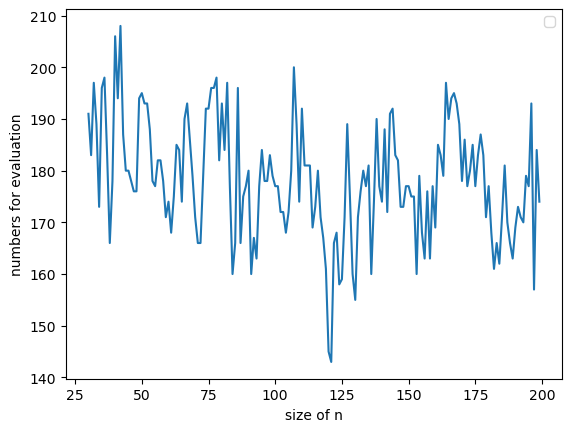

In [73]:
plt.plot(x_list,evaluate_list)
plt.xlabel('size of n')
plt.ylabel('numbers for evaluation')
plt.legend()

### (b) use empirical method to decide whether there is one superlinear convergence

We can use the convergence rate of the gradient to decide whether x_k is superlinearly convergent. 
Aim to find 
$$
\frac{\|\nabla f_{k+1} \|}{\|\nabla f_{k} \|} < 10^{-3}
$$
when the iteration terminates

In [74]:
def bfgs_rosenbrock_b(x_in,tol,iter):
    X = x_in
    n = 0
    f_x,g = Rosenbrock(X)
    B = Hessian(X)
    g_old = g
    while(n < iter and np.linalg.norm(g) > tol):
        p = np.linalg.lstsq(-B,g.T)[0]
        alpha,counts = step_length_Rosenbrock(f_x,g,X,p)
        X_new = X + alpha*p
        f_x_new,g_new = Rosenbrock(X_new)
        s = X_new - X
        y = g_new - g

        B = damp(B,s,y)
        X = X_new
        g_old = g
        g = g_new
        f_x = f_x_new
        n = n + 1
    
    return np.linalg.norm(g_new)/np.linalg.norm(g_old)

In [78]:
A = np.array([5,5,5,5,5])

print(bfgs_rosenbrock_b(A,10**(-5),300))

0.15283383061976408


/tmp/ipykernel_672/2929050982.py:8: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  p = np.linalg.lstsq(-B,g.T)[0]


So empirically x_k should not be superlinearly convergent.